# Objectif : 
Ce notebook a pour but **de charger, explorer et nettoyer** les jeux de données fournis par le courtier dans le cadre du reporting mensuel.

# Datasets :
- Contrats
- Quittances
- Sinistres
- Tarifs

# Étapes :
1. Chargement des données
2. Aperçu général et typage
3. Pipeline de nettoyage (listes, dates, pourcentage)
5. Valeurs manquantes résiduelles
4. Synthèse des anomalies de nettoyage identifiées



In [21]:
import os
import re
import numpy as np
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append("../scripts")
from utils import * 

## 1. Chargement des données

In [22]:
# Dossier contenant les données brutes
folder_path = "../data/raw"

# Schema attendu des fichiers à utiliser comme clés
file_mapping = {
    "contrats": "df_contrats",
    "quittances": "df_quittances",
    "sinistres": "df_sinistres",
    "tarif": "df_tarifs"
}

# Parcours les CSV du dossier et charger en DataFrame
dataset = load_files_raw(folder_path=folder_path, file_mapping=file_mapping)


    -> Modifications détectées dans 'Case Study Data Analyst - Tarif.csv' : 576 ligne(s) nettoyée(s)
OK - Chargé : Case Study Data Analyst - Tarif.csv --> dataset ['df_tarifs']
OK - Chargé : Case Study Data Analyst - Quittances.csv --> dataset ['df_quittances']
OK - Chargé : Case Study Data Analyst - Contrats.csv --> dataset ['df_contrats']
OK - Chargé : Case Study Data Analyst - Sinistres.csv --> dataset ['df_sinistres']


## 2. Aperçu et typage

In [23]:
dataset.keys()

dict_keys(['df_tarifs', 'df_quittances', 'df_contrats', 'df_sinistres'])

In [24]:
# Afficher l'ensemble des colonnes sans ellipses
pd.set_option('display.max_columns', None)

for name, df in dataset.items():
    print(f"\n📊 Résumé du dataset : {name}")
    display(df.shape)
    display(df.head())

    summary = pd.DataFrame({
        "dtype": df.dtypes,
        "missing_count": df.isnull().sum(),
        "missing_pct": (df.isnull().mean() * 100).round(1)
    })

    display(summary)


📊 Résumé du dataset : df_tarifs


(720, 7)

,animal,age,couverture,taux,healthLimit,franchise,healthHthcMonthly
0,Chien,0,Accident,0.6,1000,0,9.03
1,Chat,0,Accident,0.6,1000,0,6.78
2,Chien,1,Accident,0.6,1000,0,9.03
3,Chat,1,Accident,0.6,1000,0,6.78
4,Chien,2,Accident,0.6,1000,0,9.60


,dtype,missing_count,missing_pct
animal,object,0,0.0
age,int64,0,0.0
couverture,object,0,0.0
taux,float64,0,0.0
healthLimit,int64,0,0.0
franchise,int64,0,0.0
healthHthcMonthly,float64,0,0.0



📊 Résumé du dataset : df_quittances


(11276, 19)

,healthPremiumInclTax,healthTax,preventionTax,liabilityPremiumInclTax,healthBrokerFee,preventionPremiumInclTax,coverRef,endCoverDate,coverId,issuanceDate,deathBrokerFee,deathHthc,deathPremiumInclTax,receiptId,deathTax,startCoverDate,preventionBrokerFee,preventionHthc,healthHthc
0,14.99,1.328242,0.74,0,1.60,9,sub_1K4o8mF5i98BakySnnHC38o6-250268443852300,2022-09-01,Sub_DLM_1808810-0,2021-09-12,0.0,0.0,0,no_discount-2CCBD08A-11552-0,0.0,2021-09-12,-0.07,8.33,11.83
1,12.99,1.178901,0.00,0,2.89,0,sub_JiCYxCQKnEKvci-250269590225741,2022-01-21,Sub_1155258-0,2021-12-21,0.0,0.0,0,no_discount-2CCBD08A-13177-0,0.0,2021-12-21,0.00,0.00,9.03
2,12.99,1.178901,0.00,0,2.89,0,sub_JiCYxCQKnEKvci-250269590225741,2021-07-21,Sub_1155258-0,2021-06-21,0.0,0.0,0,no_discount-in_1J4m94F5i98BakySBpcPIFKV-250269...,0.0,2021-06-21,0.00,0.00,9.03
3,12.99,1.178901,0.00,0,2.89,0,sub_JiCYxCQKnEKvci-250269590225741,2021-08-21,Sub_1155258-0,2021-07-21,0.0,0.0,0,no_discount-in_1JFeRfF5i98BakySEFRNzjvf-250269...,0.0,2021-07-21,0.00,0.00,9.03
4,12.99,1.178901,0.00,0,2.89,0,sub_JiCYxCQKnEKvci-250269590225741,2021-09-21,Sub_1155258-0,2021-08-21,0.0,0.0,0,no_discount-in_1JQtDhF5i98BakyS1y78EEcz-250269...,0.0,2021-08-21,0.00,0.00,9.03


,dtype,missing_count,missing_pct
healthPremiumInclTax,float64,0,0.0
healthTax,float64,0,0.0
preventionTax,float64,0,0.0
liabilityPremiumInclTax,int64,0,0.0
healthBrokerFee,float64,0,0.0
preventionPremiumInclTax,int64,0,0.0
coverRef,object,0,0.0
endCoverDate,object,0,0.0
coverId,object,0,0.0
issuanceDate,object,0,0.0



📊 Résumé du dataset : df_contrats


(3681, 35)

,healthPremiumInclTax,preventionTax,healthBrokerFee,preventionPremiumInclTax,coverRef,petRace,deathBrokerFee,liabilityCovered,coverEndDate,coverRate,petSick,deathPremiumInclTax,petUuidType,petUuid,petType,petOwnerBirthday,coverId,deathTax,healthLimit,preventionBrokerFee,preventionHthc,petOwnerName,coverStartDate,preventionLimit,healthHthc,petSex,healthTax,petBirthday,petName,deathHthc,petOwnerAddress,petOldDiseases,deathCapitalLimit,deductibleLimit,customerId
0,272.53,0.00,55.88,0.00,sub_JO4FupTmKndXKI-250269608454258,bouvier_bernois,0.0,FALSE,2022-04-28,80%,healthy,0.0,chip,250269608454258,dog,1989-07-27,Sub_1880770,0.0,1500,0.00,0.00,xxx,2021-04-28,0,192.12,FEMALE,24.527473,2020-01-29,Roquette,0.0,xxxFrance,[],0,0,Cus_1813539
1,272.53,4.88,55.88,59.54,sub_JOIIjjikIBaeyo-250268502022433,berger_creole,0.0,FALSE,2022-04-29,80%,healthy,0.0,chip,250268502022433,dog,1987-09-02,Sub_1643327,0.0,1500,4.62,50.04,xxx,2021-04-29,50,192.12,FEMALE,24.527473,2020-09-20,Soba,0.0,xxxFrance,[],0,0,Cus_1091499
2,238.71,0.00,31.35,0.00,sub_JOKXQzz6v8COZC-250269300000660,norvegien,0.0,FALSE,2022-04-29,100%,not_healthy,0.0,chip,250269300000660,cat,1987-03-11,Sub_1323061,0.0,1500,0.00,0.00,xxx,2021-04-29,0,185.88,MALE,21.484286,2019-10-28,PRINCE LASHA,0.0,xxxFrance,"[""Cystite""]",0,0,Cus_1867875
3,238.71,0.00,31.35,0.00,sub_JOQycpLQ2NuWUR-250269608770991,somali,0.0,FALSE,2022-04-29,100%,not_healthy,0.0,chip,250269608770991,cat,1996-05-16,Sub_1286981,0.0,1500,0.00,0.00,xxx,2021-04-29,0,185.88,MALE,21.484286,2020-10-24,Rouflaquette,0.0,xxxFrance,"[""Autre""]",0,0,Cus_1820361
4,350.77,4.92,71.28,60.00,sub_JOeRKHAuTCzVP7-250269608652865,golden-retriever,0.0,FALSE,2022-04-30,100%,healthy,0.0,chip,250269608652865,dog,1985-11-15,Sub_1121929,0.0,1500,5.04,50.04,xxx,2021-04-30,50,247.92,FEMALE,31.569231,2020-09-06,Rhapsodie,0.0,xxxFrance,[],0,0,Cus_1624175


,dtype,missing_count,missing_pct
healthPremiumInclTax,float64,0,0.0
preventionTax,float64,0,0.0
healthBrokerFee,float64,0,0.0
preventionPremiumInclTax,float64,0,0.0
coverRef,object,0,0.0
petRace,object,48,1.3
deathBrokerFee,float64,0,0.0
liabilityCovered,object,116,3.2
coverEndDate,object,1,0.0
coverRate,object,0,0.0



📊 Résumé du dataset : df_sinistres


(5014, 14)

,actDescription,claimPaid,notificationDate,guarantee,claimOutstanding,actDate,actCategory,coverRef,coverId,actType,actId,incidentId,actValue,incidentDate
0,DiarrhÃ©e,25.20,2021-11-02T15:53:24.202877,0,0,11/10/2021,MALADIE,sub_JiCYxCQKnEKvci-250269590225741,Sub_1155258-0,EXAM,C_1757vki5_1,C_1757vki5,42.0,8/10/2021
1,DiarrhÃ©e,8.34,2021-11-02T15:53:24.202877,0,0,11/10/2021,MALADIE,sub_JiCYxCQKnEKvci-250269590225741,Sub_1155258-0,EXAM,C_1757vki5_2,C_1757vki5,13.9,8/10/2021
2,DiarrhÃ©e,8.34,2021-11-02T15:53:24.202877,0,0,11/10/2021,MALADIE,sub_JiCYxCQKnEKvci-250269590225741,Sub_1155258-0,PHAR,C_1757vki5_3,C_1757vki5,13.9,8/10/2021
3,gastrite,25.20,2021-11-26T13:28:55.722379,0,0,25/11/2021,MALADIE,sub_JiCYxCQKnEKvci-250269590225741,Sub_1155258-0,EXAM,C_9hrr1z1f_1,C_9hrr1z1f,42.0,23/11/2021
4,NaN,7.92,2021-11-26T13:28:55.722379,0,0,25/11/2021,MALADIE,sub_JiCYxCQKnEKvci-250269590225741,Sub_1155258-0,PHAR,C_9hrr1z1f_2,C_9hrr1z1f,13.2,23/11/2021


,dtype,missing_count,missing_pct
actDescription,object,2403,47.9
claimPaid,float64,0,0.0
notificationDate,object,0,0.0
guarantee,int64,0,0.0
claimOutstanding,int64,0,0.0
actDate,object,1,0.0
actCategory,object,0,0.0
coverRef,object,0,0.0
coverId,object,0,0.0
actType,object,0,0.0


## 3. Nettoyage : Correction des types et traitement valeurs manquantes

In [25]:
import warnings
warnings.filterwarnings("ignore", message="Could not infer format")

#anomalies d'encodage
dataset['df_sinistres']['actDescription'] = dataset['df_sinistres']['actDescription'].apply(fix_encoding)


dataset_cleaned, df_anomalies_cleaning = run_pipeline(dataset)


⚙️ Début du pipeline.
    ->> conversion des colonnes dates
    ->> conversion des colonnes pourcentage
    ->> conversion et harmonisation des booléens
    ->> identification des valeurs manquantes
Nettoyage de la table 'df_tarifs'...
Nettoyage de la table 'df_quittances'...
    ->> Suppression des colonnes contenant 'death' : ['deathBrokerFee', 'deathHthc', 'deathPremiumInclTax', 'deathTax']
    ✅ df_quittances -> 3 colonnes Dates converties : endCoverDate, issuanceDate, startCoverDate
Nettoyage de la table 'df_contrats'...
    ->> Suppression des colonnes contenant 'death' : ['deathBrokerFee', 'deathPremiumInclTax', 'deathTax', 'deathHthc', 'deathCapitalLimit']
    ⚠️ df_contrats -> Colonne 'coverEndDate' : 1 dates invalides détectées
    ⚠️ df_contrats -> Colonne 'coverStartDate' : 117 dates invalides détectées
    ✅ df_contrats -> 2 colonnes Dates converties : coverEndDate, coverStartDate
    >> Colonne 'petOldDiseases' identifiée comme liste potentielle.
Nettoyage de la table 'df

In [26]:
for name, df in dataset_cleaned.items():
    print(f"\n📊 Résumé du dataset : {name}")
    display(df.shape)
    display(df.head())

    summary = pd.DataFrame({
        "dtype": df.dtypes,
        "missing_count": df.isnull().sum(),
        "missing_pct": (df.isnull().mean() * 100).round(1)
    })

    display(summary)


📊 Résumé du dataset : df_tarifs


(720, 7)

,animal,age,couverture,taux,healthLimit,franchise,healthHthcMonthly
0,dog,0,Accident,0.6,1000,0,9.03
1,cat,0,Accident,0.6,1000,0,6.78
2,dog,1,Accident,0.6,1000,0,9.03
3,cat,1,Accident,0.6,1000,0,6.78
4,dog,2,Accident,0.6,1000,0,9.60


,dtype,missing_count,missing_pct
animal,string[python],0,0.0
age,int64,0,0.0
couverture,string[python],0,0.0
taux,float64,0,0.0
healthLimit,int64,0,0.0
franchise,int64,0,0.0
healthHthcMonthly,float64,0,0.0



📊 Résumé du dataset : df_quittances


(11276, 15)

,healthPremiumInclTax,healthTax,preventionTax,liabilityPremiumInclTax,healthBrokerFee,preventionPremiumInclTax,coverRef,endCoverDate,coverId,issuanceDate,receiptId,startCoverDate,preventionBrokerFee,preventionHthc,healthHthc
0,14.99,1.328242,0.74,0,1.60,9,sub_1K4o8mF5i98BakySnnHC38o6-250268443852300,2022-09-01,Sub_DLM_1808810-0,2021-09-12,no_discount-2CCBD08A-11552-0,2021-09-12,-0.07,8.33,11.83
1,12.99,1.178901,0.00,0,2.89,0,sub_JiCYxCQKnEKvci-250269590225741,2022-01-21,Sub_1155258-0,2021-12-21,no_discount-2CCBD08A-13177-0,2021-12-21,0.00,0.00,9.03
2,12.99,1.178901,0.00,0,2.89,0,sub_JiCYxCQKnEKvci-250269590225741,2021-07-21,Sub_1155258-0,2021-06-21,no_discount-in_1J4m94F5i98BakySBpcPIFKV-250269...,2021-06-21,0.00,0.00,9.03
3,12.99,1.178901,0.00,0,2.89,0,sub_JiCYxCQKnEKvci-250269590225741,2021-08-21,Sub_1155258-0,2021-07-21,no_discount-in_1JFeRfF5i98BakySEFRNzjvf-250269...,2021-07-21,0.00,0.00,9.03
4,12.99,1.178901,0.00,0,2.89,0,sub_JiCYxCQKnEKvci-250269590225741,2021-09-21,Sub_1155258-0,2021-08-21,no_discount-in_1JQtDhF5i98BakyS1y78EEcz-250269...,2021-08-21,0.00,0.00,9.03


,dtype,missing_count,missing_pct
healthPremiumInclTax,float64,0,0.0
healthTax,float64,0,0.0
preventionTax,float64,0,0.0
liabilityPremiumInclTax,int64,0,0.0
healthBrokerFee,float64,0,0.0
preventionPremiumInclTax,int64,0,0.0
coverRef,string[python],0,0.0
endCoverDate,datetime64[ns],0,0.0
coverId,string[python],0,0.0
issuanceDate,datetime64[ns],0,0.0



📊 Résumé du dataset : df_contrats


(3681, 30)

,healthPremiumInclTax,preventionTax,healthBrokerFee,preventionPremiumInclTax,coverRef,petRace,liabilityCovered,coverEndDate,coverRate,petSick,petUuidType,petUuid,petType,petOwnerBirthday,coverId,healthLimit,preventionBrokerFee,preventionHthc,petOwnerName,coverStartDate,preventionLimit,healthHthc,petSex,healthTax,petBirthday,petName,petOwnerAddress,petOldDiseases,deductibleLimit,customerId
0,272.53,0.00,55.88,0.00,sub_JO4FupTmKndXKI-250269608454258,bouvier_bernois,False,2022-04-28,0.8,healthy,chip,250269608454258,dog,1989-07-27,Sub_1880770,1500,0.00,0.00,xxx,2021-04-28,0,192.12,FEMALE,24.527473,2020-01-29,Roquette,xxxFrance,[],0,Cus_1813539
1,272.53,4.88,55.88,59.54,sub_JOIIjjikIBaeyo-250268502022433,berger_creole,False,2022-04-29,0.8,healthy,chip,250268502022433,dog,1987-09-02,Sub_1643327,1500,4.62,50.04,xxx,2021-04-29,50,192.12,FEMALE,24.527473,2020-09-20,Soba,xxxFrance,[],0,Cus_1091499
2,238.71,0.00,31.35,0.00,sub_JOKXQzz6v8COZC-250269300000660,norvegien,False,2022-04-29,1.0,not_healthy,chip,250269300000660,cat,1987-03-11,Sub_1323061,1500,0.00,0.00,xxx,2021-04-29,0,185.88,MALE,21.484286,2019-10-28,PRINCE LASHA,xxxFrance,['Cystite'],0,Cus_1867875
3,238.71,0.00,31.35,0.00,sub_JOQycpLQ2NuWUR-250269608770991,somali,False,2022-04-29,1.0,not_healthy,chip,250269608770991,cat,1996-05-16,Sub_1286981,1500,0.00,0.00,xxx,2021-04-29,0,185.88,MALE,21.484286,2020-10-24,Rouflaquette,xxxFrance,['Autre'],0,Cus_1820361
4,350.77,4.92,71.28,60.00,sub_JOeRKHAuTCzVP7-250269608652865,golden-retriever,False,2022-04-30,1.0,healthy,chip,250269608652865,dog,1985-11-15,Sub_1121929,1500,5.04,50.04,xxx,2021-04-30,50,247.92,FEMALE,31.569231,2020-09-06,Rhapsodie,xxxFrance,[],0,Cus_1624175


,dtype,missing_count,missing_pct
healthPremiumInclTax,float64,0,0.0
preventionTax,float64,0,0.0
healthBrokerFee,float64,0,0.0
preventionPremiumInclTax,float64,0,0.0
coverRef,string[python],0,0.0
petRace,string[python],48,1.3
liabilityCovered,bool,0,0.0
coverEndDate,datetime64[ns],1,0.0
coverRate,float64,0,0.0
petSick,string[python],0,0.0



📊 Résumé du dataset : df_sinistres


(5014, 14)

,actDescription,claimPaid,notificationDate,guarantee,claimOutstanding,actDate,actCategory,coverRef,coverId,actType,actId,incidentId,actValue,incidentDate
0,['Diarrhée'],25.20,2021-11-02 15:53:24.202877,0,0,2021-10-11,MALADIE,sub_JiCYxCQKnEKvci-250269590225741,Sub_1155258-0,EXAM,C_1757vki5_1,C_1757vki5,42.0,2021-10-08
1,['Diarrhée'],8.34,2021-11-02 15:53:24.202877,0,0,2021-10-11,MALADIE,sub_JiCYxCQKnEKvci-250269590225741,Sub_1155258-0,EXAM,C_1757vki5_2,C_1757vki5,13.9,2021-10-08
2,['Diarrhée'],8.34,2021-11-02 15:53:24.202877,0,0,2021-10-11,MALADIE,sub_JiCYxCQKnEKvci-250269590225741,Sub_1155258-0,PHAR,C_1757vki5_3,C_1757vki5,13.9,2021-10-08
3,['gastrite'],25.20,2021-11-26 13:28:55.722379,0,0,2021-11-25,MALADIE,sub_JiCYxCQKnEKvci-250269590225741,Sub_1155258-0,EXAM,C_9hrr1z1f_1,C_9hrr1z1f,42.0,2021-11-23
4,[],7.92,2021-11-26 13:28:55.722379,0,0,2021-11-25,MALADIE,sub_JiCYxCQKnEKvci-250269590225741,Sub_1155258-0,PHAR,C_9hrr1z1f_2,C_9hrr1z1f,13.2,2021-11-23


,dtype,missing_count,missing_pct
actDescription,string[python],0,0.0
claimPaid,float64,0,0.0
notificationDate,datetime64[ns],0,0.0
guarantee,int64,0,0.0
claimOutstanding,int64,0,0.0
actDate,datetime64[ns],2,0.0
actCategory,string[python],0,0.0
coverRef,string[python],0,0.0
coverId,string[python],0,0.0
actType,string[python],0,0.0


## 4. Valeurs manquantes résiduelles

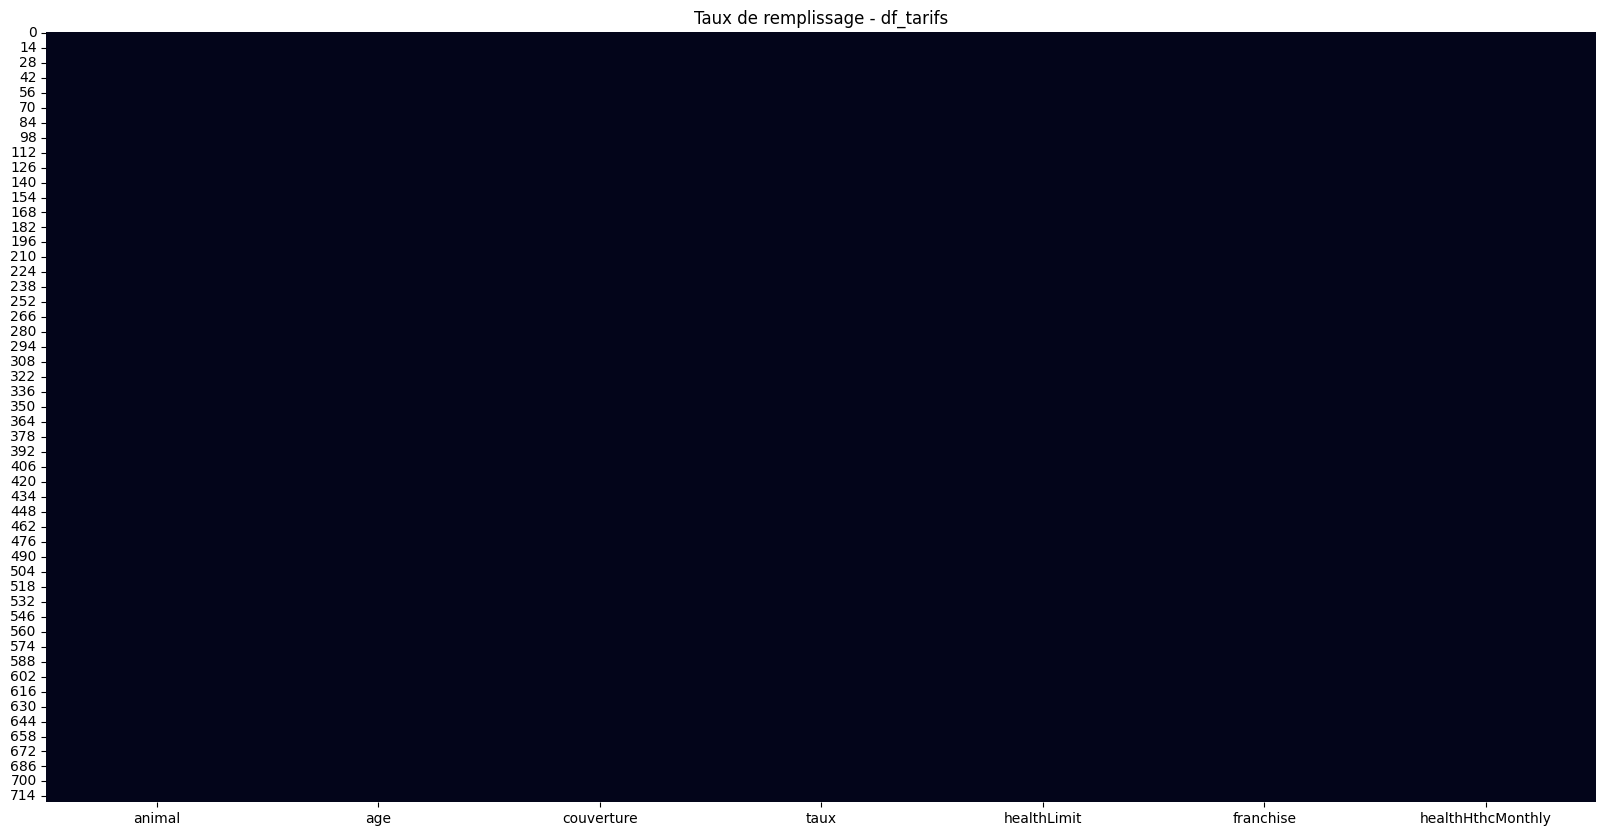

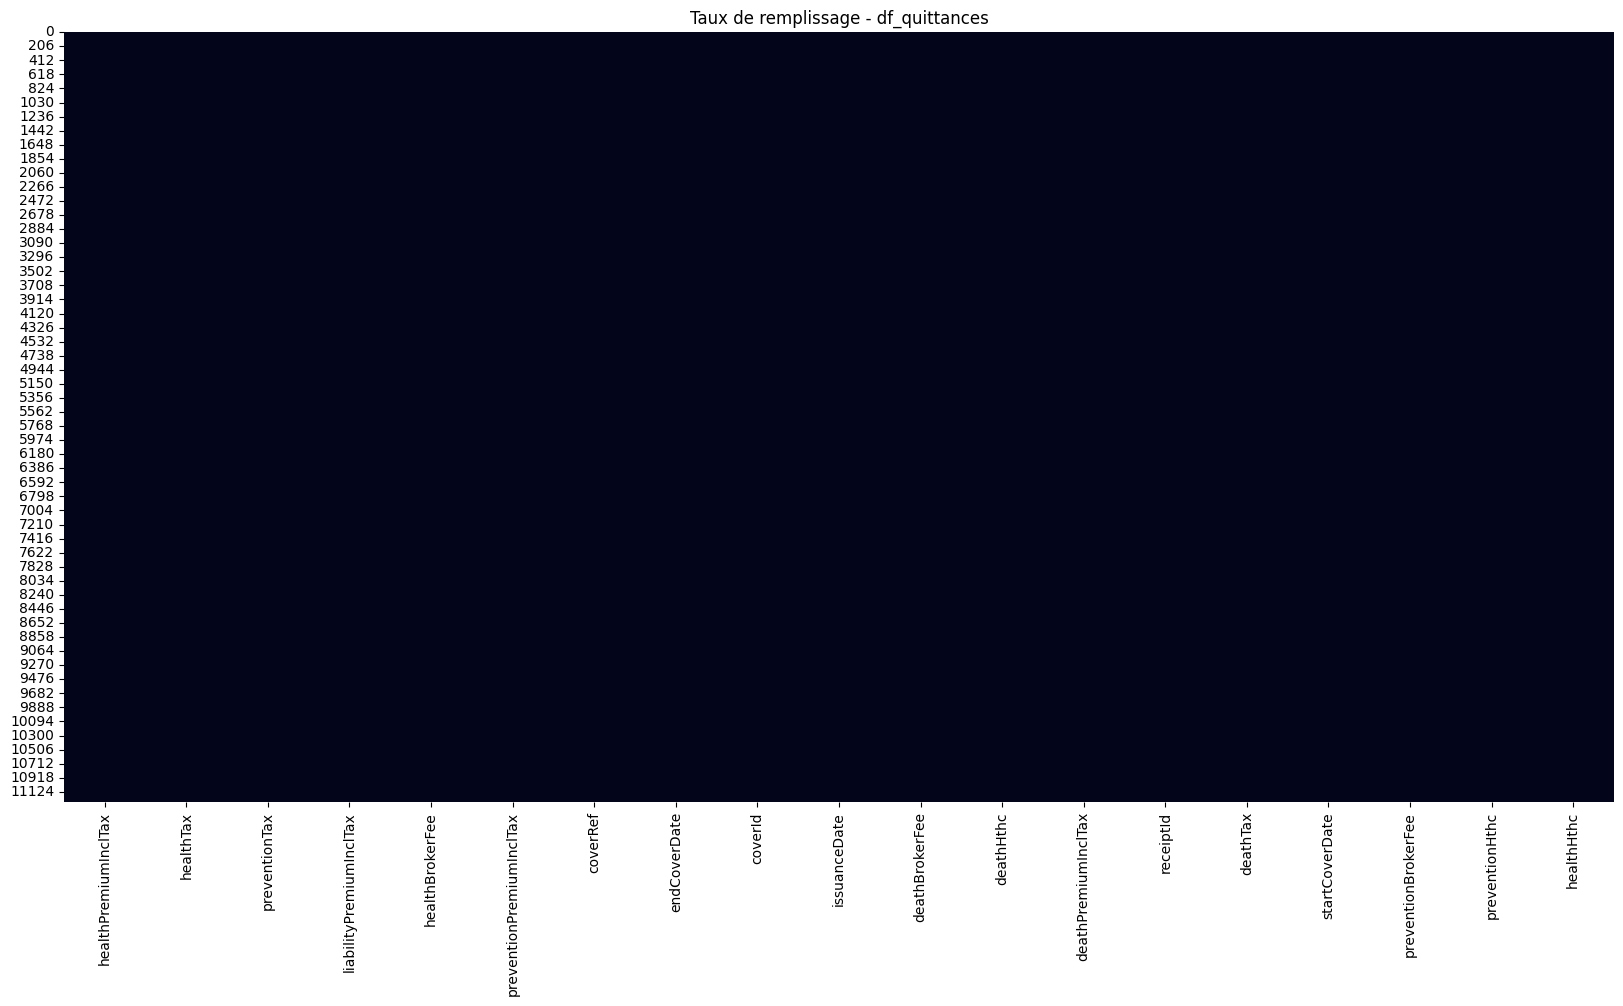

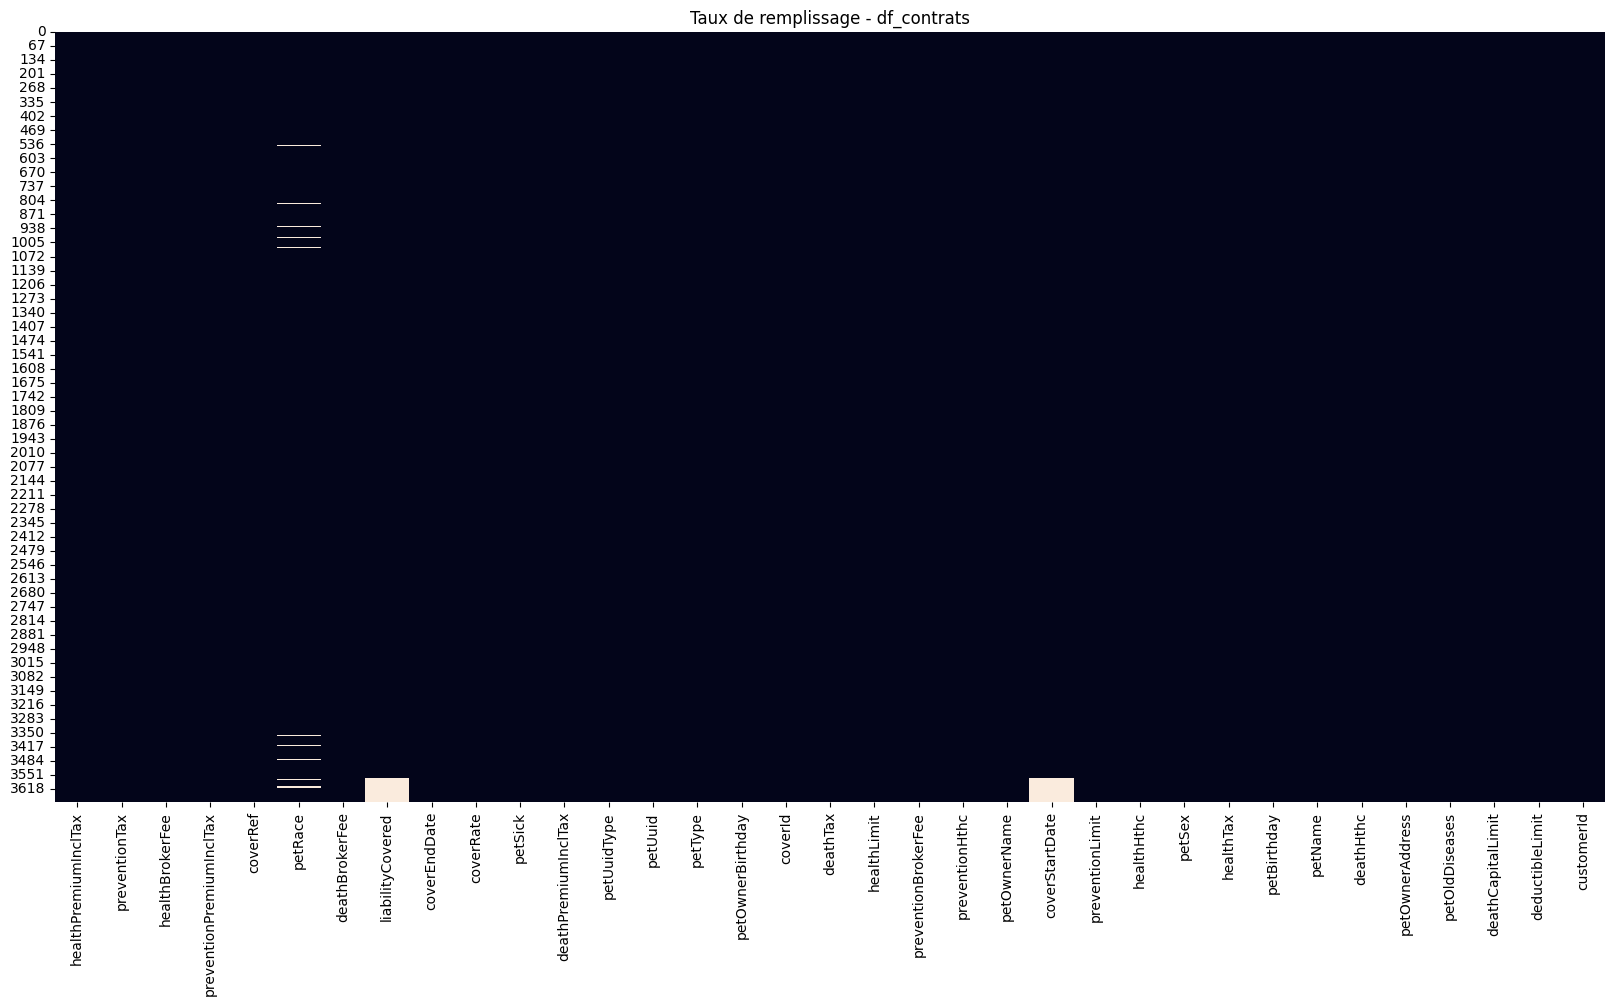

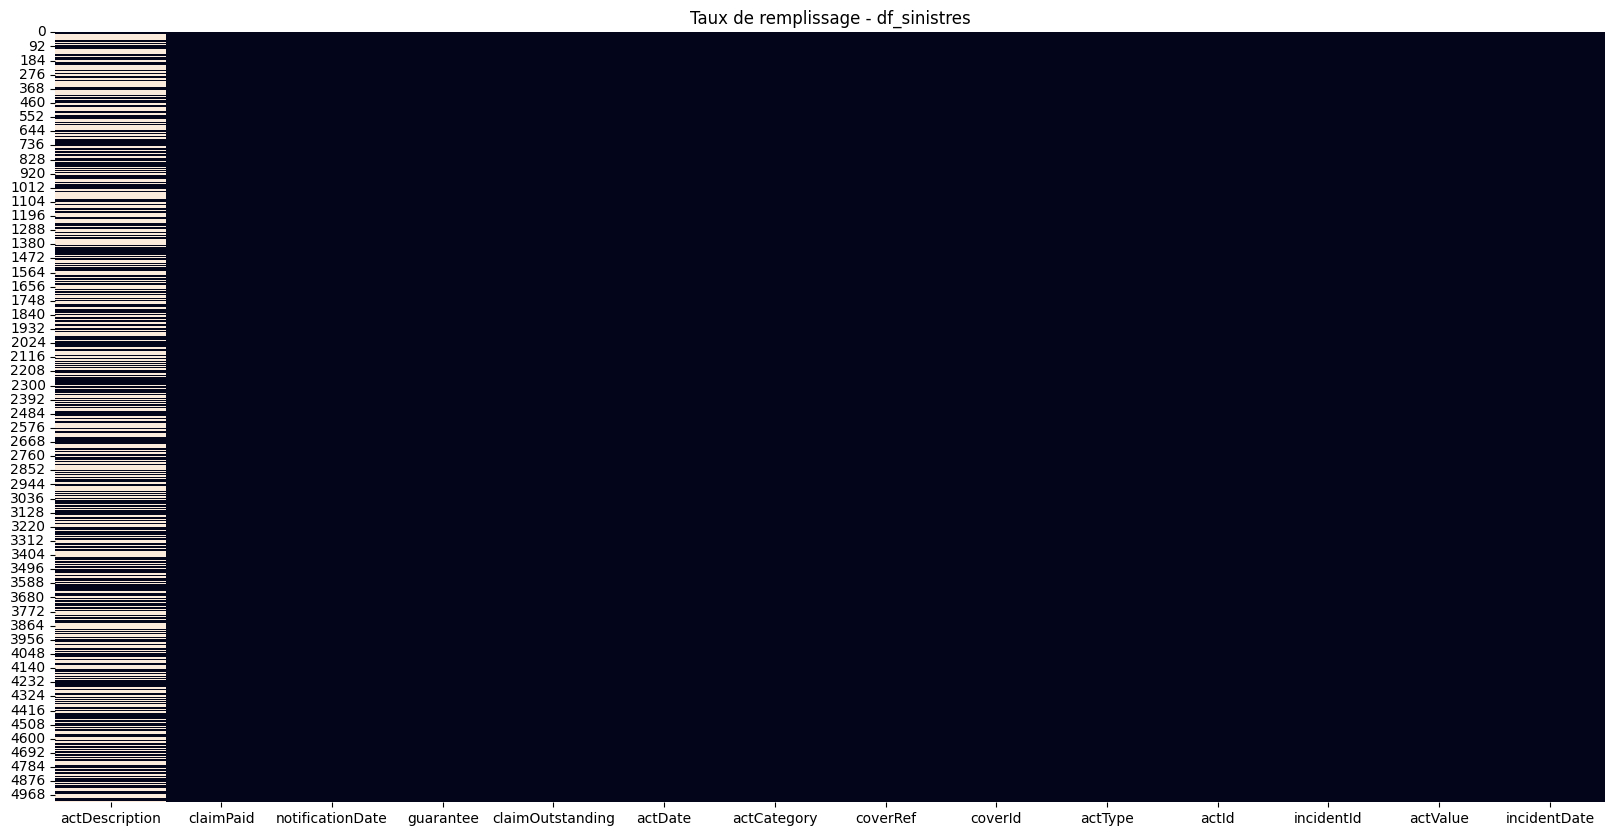

In [27]:
#Visualisation des valeurs manquantes 

for name, df in dataset.items():
    plt.figure(figsize=(20, 10), dpi=100)
    plt.title(f'Taux de remplissage - {name}')
    sns.heatmap(df.isna(), cbar=False)

## 5. Synthèse des anomalies de nettoyage

In [28]:
df_anomalies_cleaning.groupby(['table', 'column', 'type']).size().reset_index(name='nb_anomalies').sort_values('nb_anomalies', ascending=False)

,table,column,type,nb_anomalies
1,df_contrats,coverStartDate,missing_value,117
2,df_contrats,petRace,missing_value,48
5,df_sinistres,incidentDate,incorrect_format_date,2
6,df_sinistres,incidentDate,missing_value,2
0,df_contrats,coverEndDate,missing_value,1
3,df_sinistres,actDate,incorrect_format_date,1
4,df_sinistres,actDate,missing_value,1


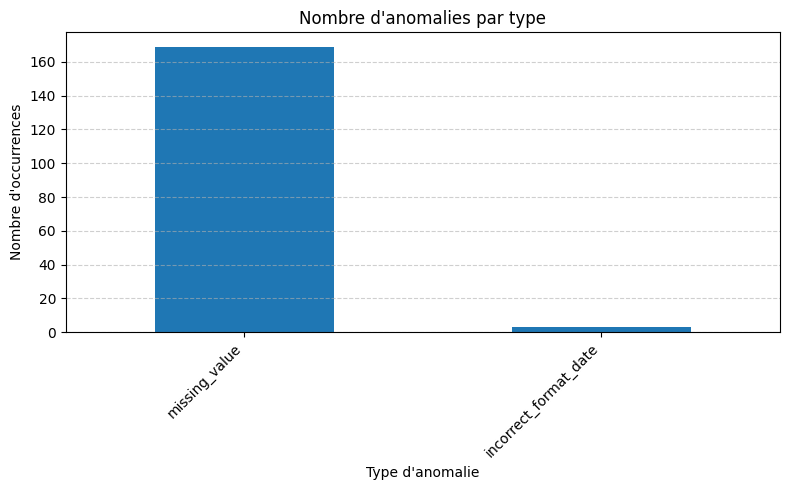

In [29]:
# Regrouper par type d'anomalie
anomaly_counts = df_anomalies_cleaning['type'].value_counts()

# Création du bar chart
plt.figure(figsize=(8, 5))
anomaly_counts.plot(kind='bar')
plt.title("Nombre d'anomalies par type")
plt.xlabel("Type d'anomalie")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
from IPython.display import display

# Sélection d'un échantillon représentatif
sample = df_anomalies_cleaning[['table', 'index', 'column', 'original_value', 'type']].sample(5)

# Style : surligner les types d'anomalies
styled_sample = (
    sample.style
    .set_properties(**{'text-align': 'left'})
    .set_table_styles([{
        'selector': 'th',
        'props': [('text-align', 'left'), ('background-color', '#e8f4f8')]
    }])
    .applymap(lambda val: 'background-color: #ffd6d6' if val == 'missing_value' else '', subset=['type'])
)

display(styled_sample)

/var/folders/yg/3xq80mlx3xb842y5xs09_yvm0000gn/T/ipykernel_14812/319387864.py:14: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(lambda val: 'background-color: #ffd6d6' if val == 'missing_value' else '', subset=['anomaly_type'])


KeyError: "None of [Index(['anomaly_type'], dtype='object')] are in the [columns]"

# Conclusion

- Les anomalies de nettoyage ont été exportés dans `outputs` pour transmission au courtier. 
- Les dataframes nettoyés ont été exportés dans `data/processed` au format parquet pour conserver le typage. 

==> Next step : Contrôle de l'application des règles Business dans le notebook `02_business_rules.ipynb`